# Notebook to check the simulated atmospheric transparencies 

# Load necessary packages 

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
import numpy as np
import os, sys
import matplotlib as mpl
import pandas as pd
import itertools
from astropy.io import fits

# How do the different parameters affect the atmospheric transparency? 

The main sources of atmospheric absorption are molecular absorption, such as water molecules or ozone, Rayleigh scattering by molecules, and aerosol scattering. The impact of each of these elements on the atmospheric absorption / transmission depends on the wavelength. For example, Rayleigh and aerosol scattering have a greater impact on the bluer wavelengths, while the water vapor (PWV) affects more the redder end of the spectrum. 

<img align="center" src = Solar_Spectrum.png width=750 style="padding: 10px"> 

# Let's have a look at the atmospheric transparency for different values of the parameters that we have considered: 

In [4]:
t_path = './simulated_transparencies/linear_distribution/discrete/'

In [7]:
min_pwv = 1.0
max_pwv = 9.0
ref_pwv = 3.0
min_aero = 0.01
max_aero = 0.09
ref_aero = 0.04
min_am = 1.0
max_am = 2.0
ref_am = 1.2

cloud = 0.0

# Aerosols 

In [59]:
variable_param = 'aerosol'

In [60]:
t_file = 'simulated_transparencies_varying_{0}_airmass_{1}_cloud_{2}.fits'.format(variable_param,ref_am,cloud)

In [61]:
t_in = os.path.join(t_path,t_file)
t = fits.open(t_in)
head = t[0].header
data = t[0].data

In [62]:
n_atmp = head['ID_RES']
n_sim = head['NTRANSP']
print(n_atmp, n_sim)

5 9


In [63]:
wl_t = data[0][n_atmp:]*10.

In [64]:
min_transp = data[1,n_atmp:]
max_transp = data[n_sim,n_atmp:]

Text(0.5, 1.0, 'Varying aerosol. PWV = 3.0, airmass = 1.2, clouds = 0.0')

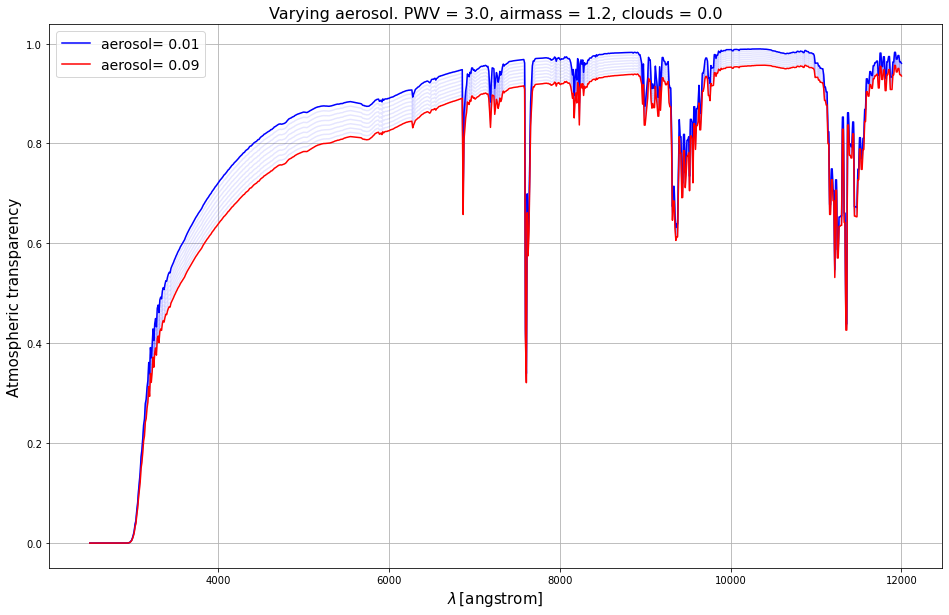

In [65]:
fig=plt.figure(figsize=(16,10))
for atm_i in range(1,n_sim):
    plt.plot(wl_t,data[atm_i][n_atmp:],color='b',alpha=0.1)
plt.plot(wl_t,min_transp,color='b',label=variable_param+'= {0:.2f}'.format(min_aero))
plt.plot(wl_t,max_transp,color='r',label=variable_param+'= {0:.2f}'.format(max_aero))
plt.xlabel('$\\lambda \, [$'+'angstrom]',fontsize=15)
plt.ylabel('Atmospheric transparency',fontsize=15)
plt.grid()
plt.legend(fontsize=14)
plt.title('Varying {0}. PWV = {1}, airmass = {2}, clouds = {3}'.format(variable_param,ref_pwv,ref_am,cloud),fontsize=16)

# Precipitable water vapor (PWV) 

In [66]:
variable_param = 'pwv'

In [67]:
t_file = 'simulated_transparencies_varying_{0}_airmass_{1}_cloud_{2}.fits'.format(variable_param,ref_am,cloud)

In [68]:
t_in = os.path.join(t_path,t_file)
t = fits.open(t_in)
head = t[0].header
data = t[0].data

In [69]:
n_atmp = head['ID_RES']
n_sim = head['NTRANSP']
print(n_atmp, n_sim)

5 9


In [70]:
wl_t = data[0][n_atmp:]*10.

In [71]:
min_transp = data[1,n_atmp:]
max_transp = data[n_sim,n_atmp:]

Text(0.5, 1.0, 'Varying pwv. Aerosols = 0.04, airmass = 1.2, clouds = 0.0')

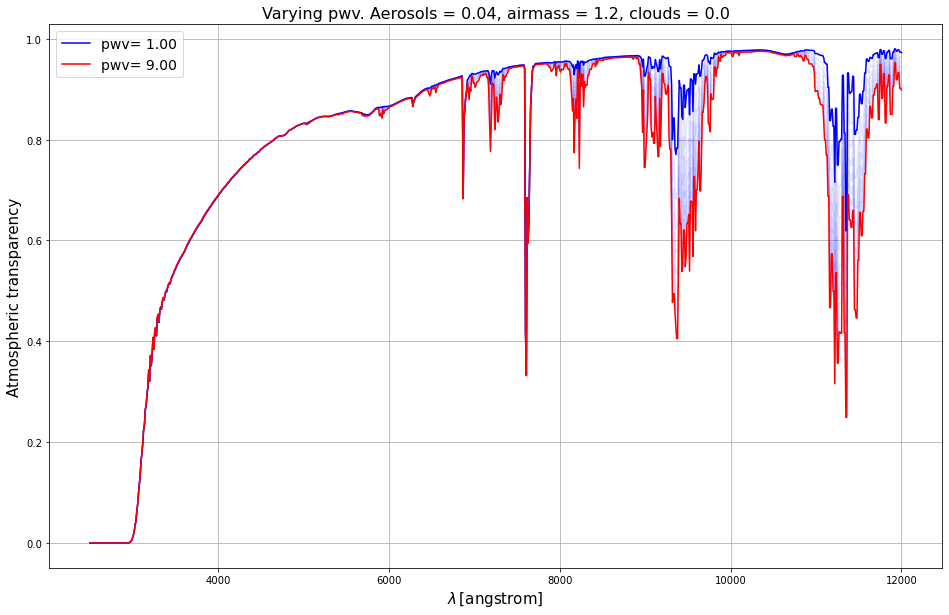

In [72]:
fig=plt.figure(figsize=(16,10))
for atm_i in range(1,n_sim):
    plt.plot(wl_t,data[atm_i][n_atmp:],color='b',alpha=0.1)
plt.plot(wl_t,min_transp,color='b',label=variable_param+'= {0:.2f}'.format(min_pwv))
plt.plot(wl_t,max_transp,color='r',label=variable_param+'= {0:.2f}'.format(max_pwv))
plt.xlabel('$\\lambda \, [$'+'angstrom]',fontsize=15)
plt.ylabel('Atmospheric transparency',fontsize=15)
plt.grid()
plt.legend(fontsize=14)
plt.title('Varying {0}. Aerosols = {1}, airmass = {2}, clouds = {3}'.format(variable_param,ref_aero,ref_am,cloud),fontsize=16)

While aerosols and airmass affect the transparency by scattering, PWV and other molecules impact it by absorving light, inducing absorption lines. The spectrum of molecules is very complex, due to the many oscillation modes (vibrational+rotational) they have 

<img align="center" src = agua.gif width=750 style="padding: 10px"> 

https://water.lsbu.ac.uk/water/water_vibrational_spectrum.html

# Airmass 

We assume reference values for PWV and aerosols 

In [73]:
variable_param = 'airmass'
airmass = np.linspace(min_am,max_am,11)

In [40]:
t_file_min = 'simulated_transparencies_varying_{0}_airmass_{1}_cloud_{2}.fits'.format('pwv',min_am,cloud)
t_file_max = 'simulated_transparencies_varying_{0}_airmass_{1}_cloud_{2}.fits'.format('pwv',max_am,cloud)

Text(0.5, 1.0, 'Varying airmass. PWV = 3.0, aerosols = 0.04, clouds = 0.0')

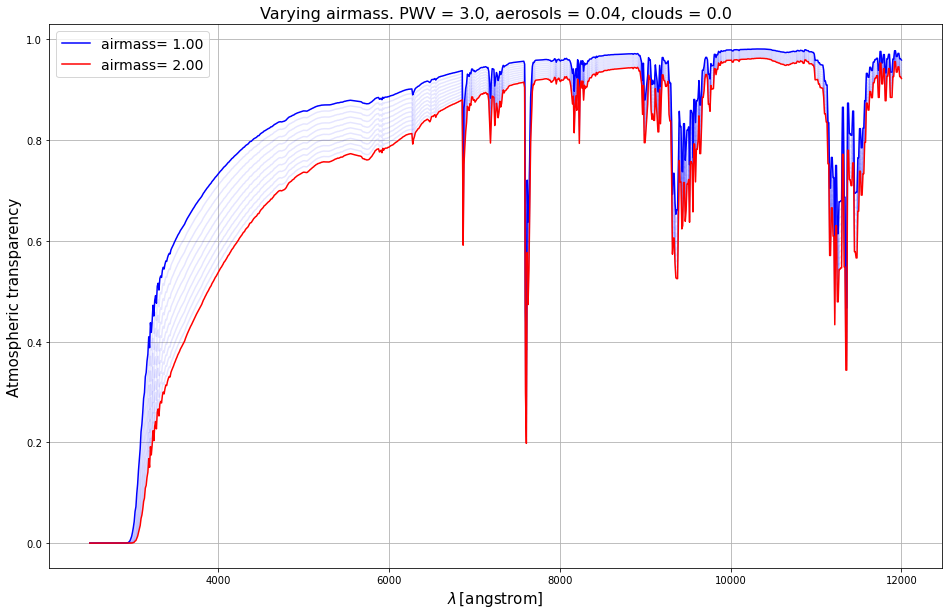

In [79]:
fig=plt.figure(figsize=(16,10))
for am in airmass:
    t_file_ = 'simulated_transparencies_varying_{0}_airmass_{1:.1f}_cloud_{2}.fits'.format('pwv',am,cloud)
    t_in_ = os.path.join(t_path,t_file_)
    t_ = fits.open(t_in_)
    head_ = t_[0].header
    data_ = t_[0].data
    
    n_atmp = head['ID_RES']
    n_sim = head['NTRANSP']
    wl_t_ = data_[0][n_atmp:]*10.
    
    ref_index = np.where(data_[:,head_['ID_PWV']]==ref_pwv)[0][0]
    if am==min_am:
        plt.plot(wl_t_,data_[ref_index][n_atmp:],color='b',alpha=1.0,label=variable_param+'= {0:.2f}'.format(min_am))
    elif am==max_am:
        plt.plot(wl_t_,data_[ref_index][n_atmp:],color='r',alpha=1.0,label=variable_param+'= {0:.2f}'.format(max_am))
    else:
        plt.plot(wl_t_,data_[ref_index][n_atmp:],color='b',alpha=0.1)
    
plt.xlabel('$\\lambda \, [$'+'angstrom]',fontsize=15)
plt.ylabel('Atmospheric transparency',fontsize=15)
plt.grid()
plt.legend(fontsize=14)
plt.title('Varying {0}. PWV = {1}, aerosols = {2}, clouds = {3}'.format(variable_param,ref_pwv,ref_aero,cloud),fontsize=16)